In [1]:
from data import Course
from ouc_course_tool import *
from data.schedule import CourseTable
from tests.test_config import ConfigOfTest
from ouc_course_tool.core.search_param_handle import search_param_handle

导入包

In [2]:
test_config = ConfigOfTest('./tests/test_resource/account_local.ini')
tesseract_cmd_path = 'D:/Tools/Tesseract/tesseract.exe'

login_config = LoginConfig(test_config.get_username(), test_config.get_password(), tesseract_cmd_path)

设置 Tesseract 图片识别软件
EXAMPLE DOWNLOAD URL: https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-5.3.4.20240503.exe

设置 全局变量（包括账号和密码）
设置 登录配置


In [3]:
session_id = AccountValidation(login_config).get_login_session_id()
print(session_id)

A370BBA3F9352559C04CA04BA054AF99


获取登录 ID

In [4]:
fetcher_config = FetcherConfig(session_id=session_id)
course_fetcher = CourseFetcher(config=fetcher_config)

设置 搜索配置

In [5]:
target_course = [
    # '围棋-选修',
    '概率-公共',
    '形势与政策-公共',
    '毛泽东思想-公共',
    '体育-公共',
    '离散数学-智能科学-2023',
    '计算机系统基础-智能科学-2023',
    '人工智能导论-智能科学-2022'
    '机器人学导论-智能科学-2022'
]


目标选课

In [6]:
mul_params = search_param_handle(target_course, campus=3, year_and_term='2024-1')
courses_list =  course_fetcher.get_courses_from_mul_params(mul_params)
print(courses_list)

[[Course(selection_number='16001079', course_name='[008401101063]概率统计', campus='西海岸校区', teaching_method='讲授', instructor='王雯', start_week='1-17', credits=4.0, total_hours=64, limit=120, selected_count=39, confirmed_count=0, class_time='[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 三 (1-2节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (5-6节) 每周]', class_location='南506/505', syllabus='', teaching_calendar='', notes=''), Course(selection_number='16001080', course_name='[008401101063]概率统计', campus='西海岸校区', teaching_method='讲授', instructor='王雯', start_week='1-17', credits=4.0, total_hours=64, limit=120, selected_count=64, confirmed_count=0, class_time='[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (7-8节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 三 (3-4节) 每周]', class_location='南506/505', syllabus='', teaching_calendar='', notes=''), Course(selection_number='16001081', course_name='[0084

In [21]:
importance_course = [
    '离散数学',
    # '计算机系统基础',
    '人工智能导论'
    '机器人学导论'
]

unnecessary_course = [
    '篮球',
    '足球',
    '跆拳道',
]

def is_in_course(target, course_list):
    for temp_course in course_list:
        if temp_course in target:
            return True

def limit_function(course):
    
    if is_in_course(course.course_name, importance_course):
        return False
    
    # 不要的课
    if is_in_course(course.course_name, unnecessary_course):
        return True
    
    # 超人数 不选
    if float(course.limit) < int(course.selected_count) * 1:
        return True
    
    # 早八不选
    for time in course.get_class_time_list():
        if time.start_period == 1:
            return True

限制函数

In [28]:
table = CourseTable.calculate_course(courses_list, limit_function)
table.print_courses()
selection_number_list = map(lambda course: int(course.selection_number), table.selected_courses)
print(sorted(selection_number_list, reverse=True))

概率统计
16001082 [周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 五 (3-4节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 二 (3-4节) 每周]

形势与政策-2024秋
19000177 [周次: [7, 8, 9, 10] 星期: 日 (3-4节) 每周]

毛泽东思想和中国特色社会主义理论体系概论
19000018 [周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 三 (8-9节) 单周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 三 (7-9节) 双周]

体育(初级网球)
18003235 [周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 三 (5-6节) 每周]

离散数学Ⅱ
02003004 [周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (3-4节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 二 (1-2节) 每周]

计算机系统基础
02003110 [周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (7-9节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 二 (5-6节) 单周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 二 (5-6节) 双周]

大学生职业发展教育Ⅲ
02003146 [周次: [5,

获得课程表

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 指定中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def draw_course_table(course_list: list[Course]):
    # 定义一周的天数和每天的课程节次
    days = ['一', '二', '三', '四', '五', '六', '日']
    periods = list(range(1, 13))  # 假设每天有 12 节课

    # 创建绘图对象
    fig, ax = plt.subplots(figsize=(10, 7))

    # 绘制课程表的背景网格
    ax.set_xlim(0, 7)
    ax.set_ylim(1, 13)
    ax.set_xticks([i for i in range(7)])
    ax.set_yticks([i for i in range(1, 13)])
    ax.set_xticklabels(days)
    ax.set_yticklabels(periods)
    ax.grid(True)

    # 绘制每门课程的块
    for course in course_list:
        for schedule in course.get_class_time_list():  # 如果一个课程有多个时间安排
            day_index = days.index(schedule.day_of_week)
            start_period = schedule.start_period
            end_period = schedule.end_period
            
            # 在表格上绘制课程
            rect = patches.Rectangle((day_index, start_period), 1, end_period - start_period + 1, 
                                     edgecolor='black', facecolor='skyblue', linewidth=1)
            ax.add_patch(rect)
            ax.text(day_index + 0.5, start_period + 0.5 * (end_period - start_period + 1),
                    course.course_name.split(']')[1], ha='center', va='center', fontsize=10)

    # 设置标题和标签
    plt.title('课程表')
    plt.xlabel('星期')
    plt.ylabel('节次')

    # 显示图表
    plt.show()

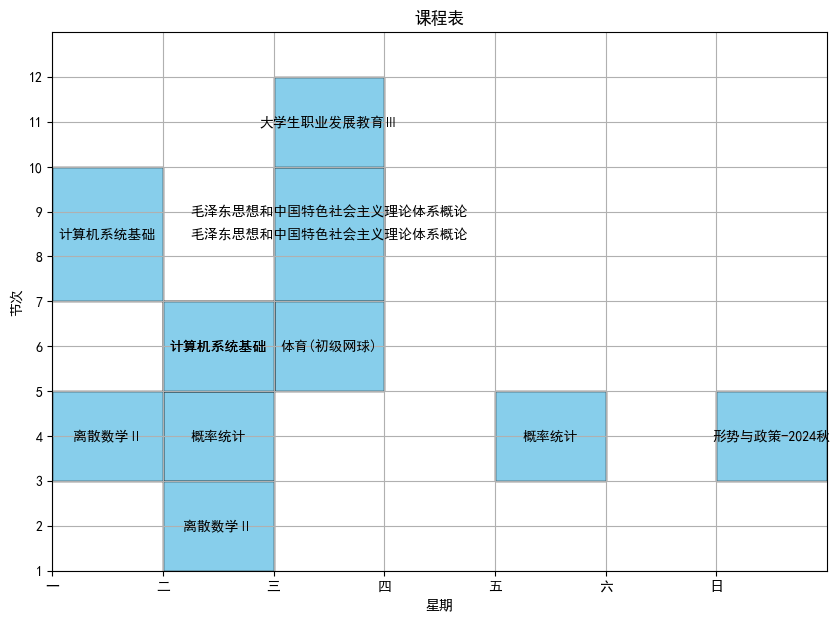

In [23]:
draw_course_table(table.selected_courses)

In [23]:
common_params = FetcherParams()
common_params.set_keyword('计算机系统基础')
common_params.sel_nj = 2023

result: list[Course] = course_fetcher.get_courses_by_params(common_params)

for course in result:
    print(course.get_class_time_list())

[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (7-9节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 四 (1-2节) 每周]
[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (7-9节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 四 (1-2节) 每周]
[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (7-9节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 二 (5-6节) 单周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 二 (5-6节) 双周]
[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (7-9节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 二 (5-6节) 每周]
